In [57]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [58]:
# Reading dataset
grna_data_f = pd.read_excel('data.xlsx')

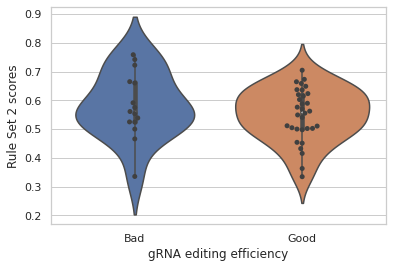

In [59]:
#Rule Set 2 vs experimental editing efficiency

ax = sns.violinplot(x="gRNA killing", y="on_target_activity", data=grna_data_f, showfliers = False)
ax = sns.swarmplot(x="gRNA killing", y="on_target_activity", data=grna_data_f, color=".25")

ax.set_ylabel('Rule Set 2 scores')
ax.set_xlabel('gRNA editing efficiency')

plt.savefig('Rule Set 2_vs_experimental_editing_efficiency.png', dpi = 300)

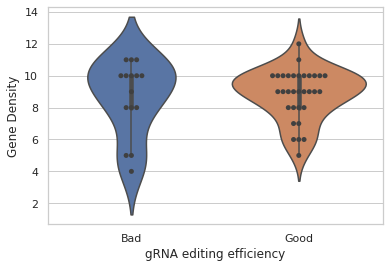

In [60]:
#Gene density vs experimental editing efficiency

ax = sns.violinplot(x="gRNA killing", y="GD", data=grna_data_f, showfliers = False)
ax = sns.swarmplot(x="gRNA killing", y="GD", data=grna_data_f, color=".25")

ax.set_ylabel('Gene Density')
ax.set_xlabel('gRNA editing efficiency')

plt.savefig('Gene_Density_vs_experimental_editing_efficiency.png', dpi = 300)

In [61]:
#CRISPROn fasta file
ofile = open("input.fa", "w")

for i in range(len(grna_data_f)):
    curr_seq = grna_data_f['LHR'][i][-4:] + grna_data_f['gRNA with PAM'][i] + grna_data_f['RHR'][i][0:3]
    ofile.write(">" + str(grna_data_f['Name'][i]) + "\n" + curr_seq + "\n")

ofile.close()

In [62]:
#CRISPROn
editing_score_crispron = pd.read_csv('crispron.csv')
crispr_on_scores = []
for i in range(np.shape(editing_score_crispron)[0]):
    if editing_score_crispron['30mer'][i][0:27][4:] in list(grna_data_f['gRNA with PAM']):
        crispr_on_scores.append(editing_score_crispron['CRISPRon'][i])
        
grna_data_f['CRISPROn'] = crispr_on_scores

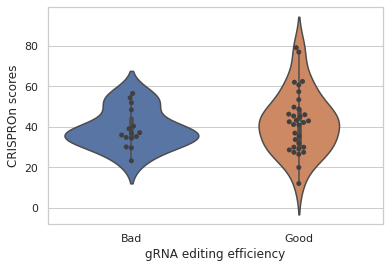

In [64]:
#CRISPROn vs experimental editing efficiency

ax = sns.violinplot(x="gRNA killing", y="CRISPROn", data=grna_data_f, showfliers = False)
ax = sns.swarmplot(x="gRNA killing", y="CRISPROn", data=grna_data_f, color=".25")

ax.set_ylabel('CRISPROn scores')
ax.set_xlabel('gRNA editing efficiency')

plt.savefig('CRISPROn_vs_experimental_editing_efficiency.png', dpi = 300)

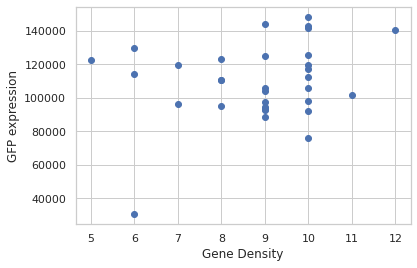

In [92]:
#Experimetal GFP Expression vs Gene Density
grna_data_f_df = grna_data_f[grna_data_f['GFP/OD'].notna()]
avg_GFP_expr = list(grna_data_f_df['GFP/OD'])
gene_density = list(grna_data_f_df['GD'])

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(gene_density, avg_GFP_expr, 'o')
ax.set_ylabel('GFP expression')
ax.set_xlabel('Gene Density')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(gene_density, avg_GFP_expr, 1)

#add linear regression line to scatterplot 
#plt.plot(gene_density, [m*i+b for i in gene_density])

plt.show()
#plt.savefig('Normalized_GFP_expression_vs_Gene_Density.png', dpi = 300, bbox_inches='tight')

In [74]:
stats.spearmanr(gene_density, avg_GFP_expr)

SpearmanrResult(correlation=0.13003470391014754, pvalue=0.4781123294806532)